In [68]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
beta = 100

In [73]:
x = np.linspace(-2,2, beta)
y = np.linspace(-2,2, beta)

c = np.zeros((beta, beta),dtype = 'complex_')



for l in range(beta):
    for m in range(beta):
        c[l][m] = x[l] + y[m]*1j

z = np.zeros((beta,beta), dtype = 'complex_')
t = np.zeros((beta,beta))

for i in range(10):
    z = z*z +c
    for l in range(beta):
        for m in range(beta):
            if (np.abs(z[l][m]) > 10e10 and t[l][m] == 0):
                t[l][m] = i
                
    

div = []
conv = []
for l in range(beta):
    for m in range(beta):
        if (np.abs(z[l][m]) > 10e10):
            div.append(c[l][m])
        else:
            conv.append(c[l][m])


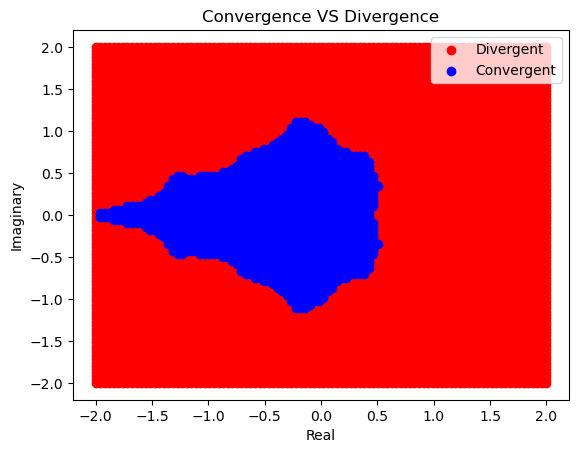

In [87]:

plt.scatter(np.real(div), np.imag(div), color='red', label="Divergent")
plt.scatter(np.real(conv), np.imag(conv), color='blue', label="Convergent")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.legend()
plt.title("Convergence VS Divergence")
plt.show()


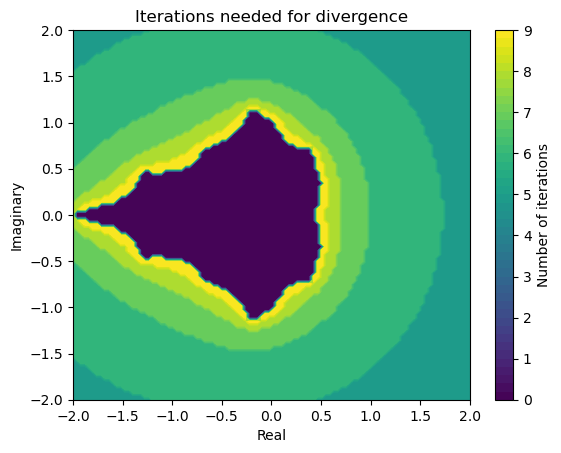

In [88]:
X,Y = np.meshgrid(x,y,indexing='ij')
plt.figure(dpi=100)

plt.contourf(X, Y, t, levels=50)
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.colorbar(label="Number of iterations")
plt.title("Iterations needed for divergence")
plt.show()

In [ ]:
def dX(sigma, X, Y):
    return -sigma*(X-Y)

def dY(r, X, Y, Z):
    return r*X-Y-X*Z

def dY(b, X, Y, Z):
    return -b*Z + X*Y

sigma=10.
r=28.
b=8./3.
solve_ivp([dX(sigma, X,Y), dY, dZ], (0, 60))